In [6]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [7]:
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [8]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.1382, 0.2592]) 
label: tensor([3.5839])


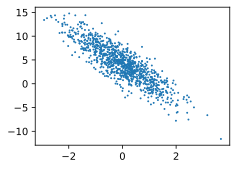

In [30]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [18]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [26]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.3163,  0.2811],
        [ 0.3391, -2.2331],
        [-0.5671, -0.5762],
        [-0.9376, -0.6269],
        [-0.3926,  0.1031],
        [-0.1345,  0.8530],
        [-0.0641, -0.4640],
        [ 1.0871, -0.4065],
        [-2.0408, -1.6091],
        [ 0.0589, -0.7939]]) 
 tensor([[ 3.8762],
        [12.4651],
        [ 5.0238],
        [ 4.4736],
        [ 3.0700],
        [ 1.0455],
        [ 5.6512],
        [ 7.7444],
        [ 5.5917],
        [ 7.0119]])


In [29]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [21]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [22]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [23]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [24]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.038385
epoch 2, loss 0.000144
epoch 3, loss 0.000053


In [25]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 9.9659e-05, -8.7619e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)
